In [122]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

!pip install requests




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:

"""# **Importação dos Pacotes**"""

import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [124]:

import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.tail(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
698,COCA COLA,COCA34,Refrigerantes,EUA
699,COLGATE,COLG34,Produtos Pessoais,EUA
700,MASTERCARD,MSCD34,Financiamento ao Consumidor,EUA
701,NIKE,NIKE34,Calçados,EUA
702,ORACLE,ORCL34,Software aplicativo,EUA
703,RAYTHEON TECH,RYTT34,Industrial,EUA
704,SCHLUMBERGER,SLBG34,Equipamentos e Serviços de Combustível,EUA
705,TIFFANY,TIFF34,Joalheria,EUA
706,US BANCORP,USBC34,Instituição Financeira,EUA
707,XP INC,XPBR31,Financeiro,Brasil


In [125]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [126]:
dados_series = yf.download(["MMMC34.SA"], start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [127]:


#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [128]:

df.head()

,Close
Date,
2018-01-02,191.039993
2018-01-03,191.100006
2018-01-04,192.899994
2018-01-05,193.199997
2018-01-08,194.399994


In [129]:

df['Close']

Date
2018-01-02    191.039993
2018-01-03    191.100006
2018-01-04    192.899994
2018-01-05    193.199997
2018-01-08    194.399994
                 ...    
2021-12-23    249.470001
2021-12-27    248.509995
2021-12-28    250.839996
2021-12-29    255.399994
2021-12-30    246.250000
Name: Close, Length: 989, dtype: float64

In [130]:
y=[]
for a in df['Close']:
  y.append(a)

In [131]:
y

[191.0399932861328,
 191.10000610351562,
 192.89999389648438,
 193.1999969482422,
 194.39999389648438,
 194.39999389648438,
 194.39999389648438,
 195.1999969482422,
 196.89999389648438,
 196.89999389648438,
 198.22999572753906,
 198.64999389648438,
 196.97000122070312,
 197.52000427246094,
 198.3000030517578,
 198.3000030517578,
 196.6999969482422,
 196.6999969482422,
 203.3000030517578,
 205.0,
 200.92999267578125,
 201.07000732421875,
 196.88999938964844,
 197.88999938964844,
 195.16000366210938,
 186.92999267578125,
 191.2899932861328,
 187.52999877929688,
 182.39999389648438,
 187.6999969482422,
 187.6999969482422,
 187.6999969482422,
 187.6999969482422,
 191.75,
 193.4600067138672,
 192.82000732421875,
 188.9499969482422,
 196.61000061035156,
 196.61000061035156,
 192.63999938964844,
 187.5399932861328,
 188.16000366210938,
 189.27999877929688,
 189.27999877929688,
 189.27999877929688,
 191.86000061035156,
 195.97000122070312,
 195.97000122070312,
 195.97000122070312,
 191.3500061

In [132]:
x = np.arange (1,len(y)+1,1)

In [133]:

"""**padronização dos dados**"""

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

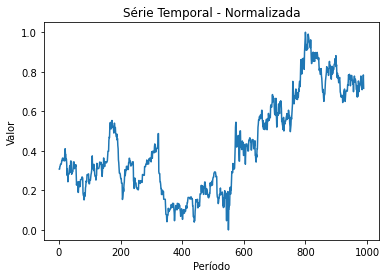

In [134]:
import matplotlib.pyplot as plt
plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

In [135]:

"""**Preparação dos conjuntos de dados de treinamento e de teste**"""

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

treino[1]: [1.        0.3074416]
treino[2]: [2.         0.30788597]
treino[3]: [3.         0.32121428]
treino[4]: [4.        0.3234357]
treino[5]: [5.         0.33232128]


In [136]:

"""**Organização do modelo de dados**"""

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [137]:

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [138]:
"""**Visualização da estruturação dos dados**"""

look_back = 1
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

treino[1]: [[0.3074416]] -> 0.3078859747609127
treino[2]: [[0.30788597]] -> 0.32121428096079413
treino[3]: [[0.32121428]] -> 0.32343570298951363
treino[4]: [[0.3234357]] -> 0.33232127811817386
treino[5]: [[0.33232128]] -> 0.33232127811817386


In [139]:
"""**Criação do Modelo de Redes Neurais**"""

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

In [140]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 100)            40800     
                                                                 
 dropout_2 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


In [141]:

modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

In [142]:
historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

In [143]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.067478,0.234685
1,0.044926,0.170265
2,0.025059,0.104129
3,0.012333,0.053182
4,0.009117,0.033824


In [144]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

4/4 [==============================] - 0s 8ms/step - loss: 0.0180
loss: 0.01796906813979149


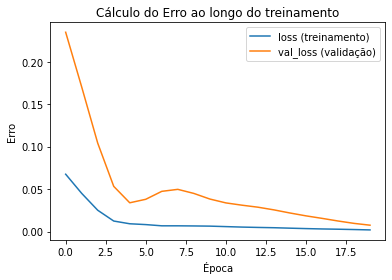

In [145]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

7/7 [==============================] - 3s 8ms/step


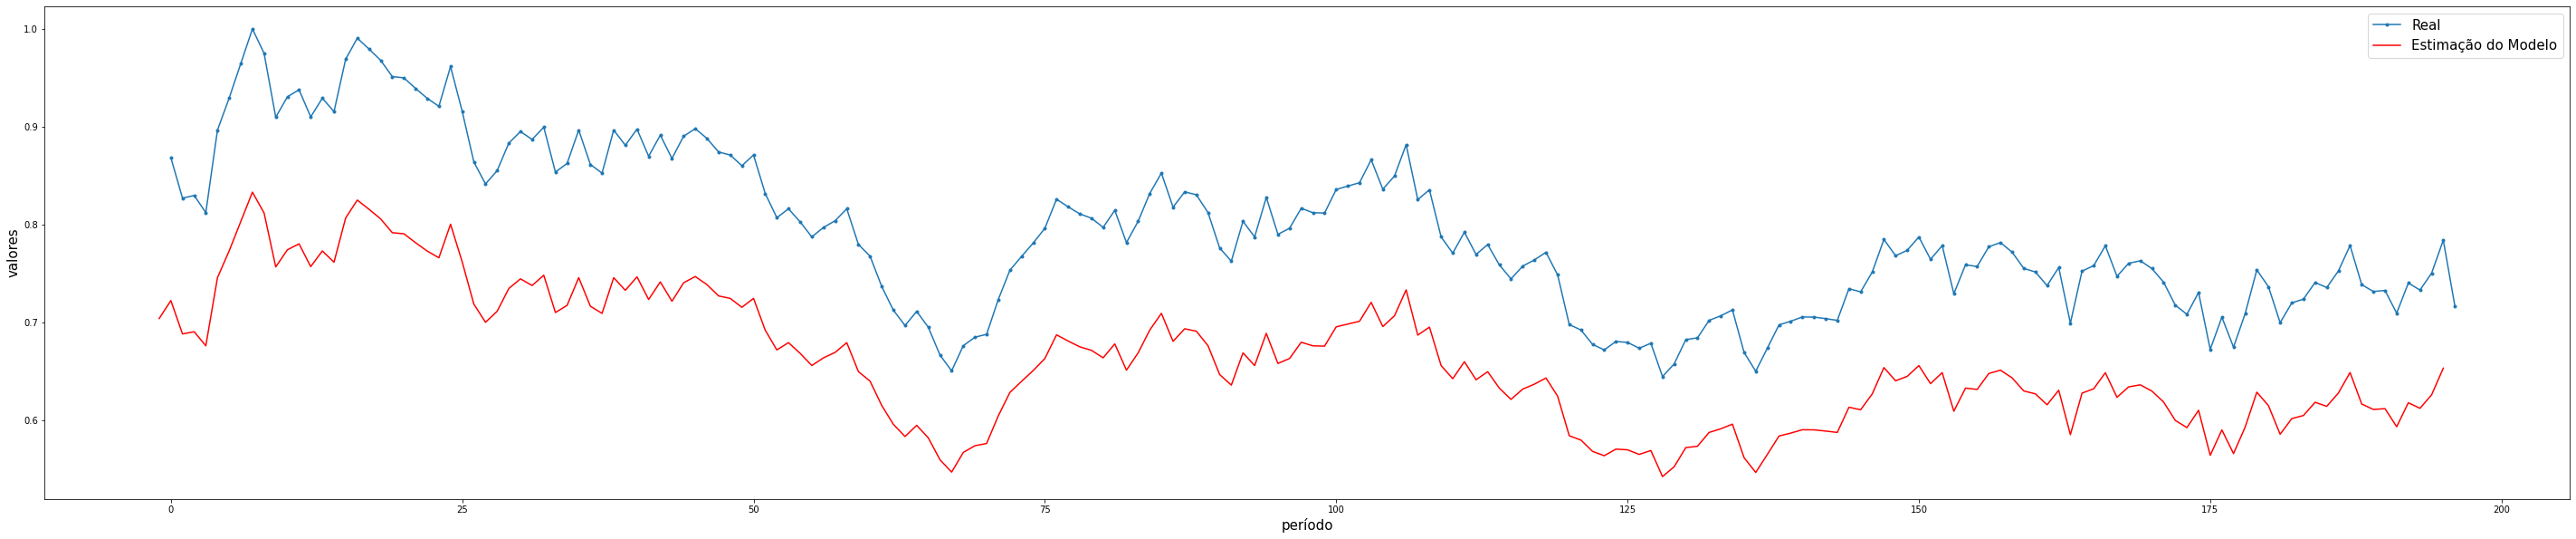

In [146]:
predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

In [147]:
len(valores_reais_y)

len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')

1/1 [==============================] - 3s 3s/step
minha predição é: [[0.65308654]]


## PREDIZENDO MAIS VALORES

In [148]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["ABUD34.SA"], start="2022-01-01", end="2022-01-05")

[*********************100%***********************]  1 of 1 completed


In [149]:
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [150]:
new_data

,Close
Date,
2022-01-03,60.000000
2022-01-04,59.849998


In [151]:
new_data.head()

,Close
Date,
2022-01-03,60.000000
2022-01-04,59.849998


In [152]:
new_data['Close']

Date
2022-01-03    60.000000
2022-01-04    59.849998
Name: Close, dtype: float64

In [153]:
y=[]
for a in new_data['Close']:
  y.append(a)

In [154]:
y

[60.0, 59.849998474121094]

In [155]:
x = np.arange (1,len(y)+1,1)

In [156]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

In [157]:
predicted_data = modelo.predict(new_data)
                                                         

1/1 [==============================] - 2s 2s/step


In [203]:
# denormalize the predicted data
predicted_data_2 = predicted_data * (maximo - minimo) + minimo

In [205]:
# print the predicted stock prices
print(predicted_data_2)

[[128.117  ]
 [128.09256]]


In [160]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["XPBR31.SA"], start="2022-01-01", end="2022-01-05")

[*********************100%***********************]  1 of 1 completed


In [161]:
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [162]:
new_data

,Close
Date,
2022-01-03,164.839996
2022-01-04,159.699997


In [163]:
new_data['Close']

Date
2022-01-03    164.839996
2022-01-04    159.699997
Name: Close, dtype: float64

In [164]:
y=[]
for a in new_data['Close']:
  y.append(a)

In [165]:
y

[164.83999633789062, 159.6999969482422]

In [166]:
x = np.arange (1,len(y)+1,1)

In [167]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

In [168]:
# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)


1/1 [==============================] - 0s 51ms/step


In [169]:
predicted_data_3 = predicted_data * (maximo - minimo) + minimo

In [170]:
print(predicted_data_3)

[[212.58221]
 [212.59077]]


In [171]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["COCA34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_4 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_4)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 45ms/step
[[67.714676]
 [67.71545 ]]


In [172]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["COLG34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_5 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_5)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 62ms/step
[[76.30153 ]
 [76.301125]]


In [173]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["MSCD34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_6 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_6)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 52ms/step
[[77.00895 ]
 [77.008415]]


In [174]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["NIKE34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_7 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_7)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 62ms/step
[[109.73867]
 [109.73602]]


In [175]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["ORCL34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_8 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_8)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 60ms/step
[[94.23324]
 [94.23192]]


In [176]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["RYTT34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_9 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_9)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 48ms/step
[[111.89584 ]
 [111.886795]]


In [177]:
# assume `dados_series` contains the new stock prices data
dados_series = yf.download(["USBC34.SA"], start="2022-01-01", end="2022-01-05")
new_data = dados_series.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
new_data
new_data['Close']
y=[]
for a in new_data['Close']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

# use the trained model to predict the new stock prices
predicted_data = modelo.predict(new_data)

predicted_data_10 = predicted_data * (maximo - minimo) + minimo
print(predicted_data_10)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 60ms/step
[[128.117  ]
 [128.09256]]


### APLICANDO A MOCHILA

In [214]:
P10 = predicted_data_10.ravel().tolist()
P10 =P10[0] 
P10

128.11700439453125

In [212]:
P9 = predicted_data_9.ravel().tolist()
P9 =P9[0] 
P9

111.89584350585938

In [197]:
P8 = predicted_data_8.ravel().tolist()
P8 =P8[0] 
P8

94.23323822021484

In [198]:
P7 = predicted_data_7.ravel().tolist()
P7 =P7[0] 
P7

109.7386703491211

In [199]:
P6 = predicted_data_6.ravel().tolist()
P6 =P6[0] 
P6

77.00894927978516

In [200]:
P5 = predicted_data_5.ravel().tolist()
P5 =P5[0] 
P5

76.30152893066406

In [201]:
P4 = predicted_data_4.ravel().tolist()
P4 =P4[0] 
P4

67.71467590332031

In [202]:
P3 = predicted_data_3.ravel().tolist()
P3 =P3[0] 
P3

212.58221435546875

In [206]:
P2 = predicted_data_2.ravel().tolist()
P2 =P2[0] 
P2

128.11700439453125

In [211]:
P1 = minha_predicao.ravel().tolist()
P1=P1[0]
P1

0.6530865430831909

In [215]:


!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.6 MB/s eta 0:00:00


In [216]:

from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [217]:
coef_funcao_objetivo = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]

In [219]:
coef_funcao_objetivo = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]
coef_restr = [1, 2, 3, 4, 5, 6,7,8,9,10]
termo_independente = 3

In [220]:

I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [221]:

x = [m.add_var(var_type=BINARY) for i in I]

In [222]:

m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))
     

In [223]:


m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [224]:


status = m.optimize(max_seconds=2)

In [225]:

status == OptimizationStatus.OPTIMAL
     

True

In [226]:


itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x3']


In [227]:
P3

212.58221435546875